# Palmer Penguins

![Introduction to Penguins](images/iter_penguins.png)     
*Palmer Penguins* [[14]](#14)         

This notebook contains an analysis of the famous Palmer Penguins dataset and serves as a comprehensive guide for analyzing the Palmer Penguins dataset, offering users a structured approach to understand and interpret its various aspects [[11]](#11). Each section focus on a specific aspect of the dataset analysis process.    

Beginning with loading the dataset and exploring its basic characteristics, such as column details and initial rows, users are then guided through understanding the types of variables present and how they can be modeled. Subsequent sections delve into categorical data analysis using bar charts, exploring continuous numerical variables through summary statistics and histograms, and examining correlations between specific variables, such as penguins' bill length and body mass. The notebook concludes with potential opportunities for further exploration and a concise summary of the findings. This structured approach enables users to gain insights into the dataset's characteristics and relationships, facilitating informed analysis and decision-making in related research or applications.

## Loading the Dataset

The pandas library in Python has been used to load Palmer Penguins dataset as it is efficient, powerful, and flexible for analyzing tabular data with ease, leveraging Python's ecosystem [[15]](#15).     
Together with pandas, other modules libraries have been imported to support to generate graphics, calculus and extract specific chunk of data from the dataset. See below a short description of the modules used from Python and their use in this analysis:
- pandas: to load Palmer Penguins dataset, display the structure of the dataset, provide info about the dataset's structure, count the number of penguins of each category available within a variable, calculate summary statistics of the continuous numerical variables, and to drop NaN [[16]](#16). 
- matplotlib: to create a bar chart to visualize the count of different species of penguins on each island, plot a histogram to visualize the distribution of continuous numerical variables, and to plot the best fit line on the scatter plot [[17]](#17).
- numpy: to calculate histogram bins and counts for plotting histograms, perform linear regression to calculate the slope and intercept for the best-fit line on the scatter plot, and to calculate the correlation coefficient between two continuous variables of this dataset [[18]](#18).
- scipy: to fit a normal distribution to the data and calculate the probability density function (PDF) for the normal distribution [[19]](#19).
- seaborn: to create a scatter plot to visualize the relationship between penguins' bill length and body mass [[20]](#20).


In [376]:
# Import pandas for the data frames 
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt 

# Import numpy
import numpy as np

# Import scipy
from scipy.stats import norm

# Import seaborn
import seaborn as sns


The penguins dataset from seaborn is then loaded into this notebook using the function read_csv() in pandas [[11]](#17) [[21]](#21). 

In [377]:
# Load the penguins data set (read_csv).
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## Exploring the Dataset

The structure of the penguins dataset can be understood by looking into it. By running 'df', it is possible to see information such as the columns names, some data in the first 5 rows and in the last 5 rows of the dataset. The total number of rows and columns are also provided.

In [378]:
# Look into the data structure
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The following assumptions can be made by looking into the structure of this dataset:
<ol>
<li>There are 7 columns with 7 variables.</li>
<li>This dataset is composed by 344 rows.</li>
<li>Some rows of the dataset have NaN, which indicate missing data.</li> 
</ol>

### Counting the missing values
The count of missing values has been performed and shed light into the completeness of the dataset and identify any areas where data might be missing or incomplete, which is crucial for ensuring the accuracy and reliability of the analysis [[22]](#22).

In [393]:
# Calculate the count of missing values for each column in the DataFrame
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:\n", missing_values_count)

Missing Values Count:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Based on this analysis the following can be understood:
- "species" and "island" are totally sorted, no penguin is left behind without a category.
- There are 2 missing values for the columns "bill_length_mm", "bill_depth_mm", "flipper_length_mm", and "body_mass_g", suggesting that there are some incomplete measurements for these physical attributes.
- As for "sex", 11 of the penguins do not have their data displayed, implying that the gender of some penguins in the dataset is not recorded.

### Display Random Sample of Data:
Displaying a random sample of data provides an initial glimpse into the dataset's variety, helping grasp its overall structure and characteristics without delving into the entire dataset at once [[23]](#23) [[24]](#24).

In [394]:
# Selecting 5 random rows from the DataFrame
random_sample = df.sample(5)
# Printing the selected random sample
print("Random Sample of Data:\n", random_sample)

Random Sample of Data:
     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
66   Adelie  Biscoe            35.5           16.2              195.0   
25   Adelie  Biscoe            35.3           18.9              187.0   
229  Gentoo  Biscoe            46.8           15.4              215.0   
237  Gentoo  Biscoe            49.2           15.2              221.0   
282  Gentoo  Biscoe            45.7           13.9              214.0   

     body_mass_g     sex  
66        3350.0  FEMALE  
25        3800.0  FEMALE  
229       5150.0    MALE  
237       6300.0    MALE  
282       4400.0  FEMALE  


From the random sample of the dataset, it can be observed a mix of penguin species (Adelie and Gentoo) from different islands (Dream and Biscoe), displaying various measurements such as bill length, bill depth, flipper length, body mass, and sex, providing a snapshot of the dataset's diversity and characteristics.

## Types of Variables to Model the Dataset

To choose the right statistical tests to analyse the dataset, the data types have to be identified for each column of the dataset as well as the count of non-null data [[25]](#25). 

In [381]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None




In the info provided above is shown that 4 of the 7 columns have a data type of float with 64 bits and the other 3 have a datatype identified as object. Object means the value is a string [[25]](#25).     
Categorical variables (species, island, and sex) are represented as objects in Palmers Penguins DataFrame and should be modeled as objects in Python to maintain their original category. The other variables as bill lenght, bill depth, flipper length and body mass are continuous numerical variables and should be represented as float64 in Python to reflect their decimal values and support the mathematical and statistical calculations such as the mean and the standard deviations [[26]](#26). 

## Categorical Data and Bar Chart:

To illustrate graphically and better display the comparison of contrast metrics of the data across the different categories the use of bar chart is suggested by Rana (2023) [[27]](#27). From the variables in the Palmers penguins dataset, any of the three categorical variable (species, island, and sex) can be appropriate for analysis. To verify what are the different values available within each category and their counts the value_counts() function in pandas is used as per below [[28]](#28).

In [395]:
# Counting the occurrences of each species
species_counts = df['species'].value_counts()
# Counting the occurrences of each island
island_counts = df['island'].value_counts()
# Counting the occurrences of each sex
sex_counts = df['sex'].value_counts()

# Printing the counts of species
print("Species Counts:\n", species_counts)
# Printing the counts of islands
print("Island Counts:\n", island_counts)
# Printing the counts of sexes
print("Sex Counts:\n", sex_counts)

Species Counts:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
Island Counts:
 island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
Sex Counts:
 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


The counts provide a snapshot of penguin distribution in the dataset. Adelie penguins are the most common (152), followed by Gentoo (124) and Chinstrap (68). Biscoe Island hosts the most penguins (168), then Dream Island (124) and Torgersen Island (52). There's a nearly equal number of males (168) and females (165). These counts of values in each category offer a quick overview of the dataset's makeup, aiding in further analysis of penguin physical characteristics. The dataset contains a disproportionate number of penguins from certain islands and species compared to others, which can introduce sampling bias. This bias may skew the analysis results and lead to erroneous conclusions, especially if the islands represent different ecological or environmental conditions. Therefore, for this analysis let's have a look into the location where the penguins were identified during the research and how the species are distributed within each location. 

Firstly, island and species are grouped and the count for each possible combination is presented. Here, the functions groupby().size() were used from Pandas [[29]](#29).

In [396]:
# Grouping by island and species, then counting the occurrences
species_counts = df.groupby(['island', 'species']).size()

# Printing the counts of species for each island
print("Species Counts for Each Island:")
print(species_counts)

Species Counts for Each Island:
island     species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
dtype: int64


### Bar Chart

The bar chart below was generated to display the count of each species of penguins in this dataset that were identified in each island. However, before going further in the analysis is important to hightlight the steps taken to get to this elaborated chart: 
- Reset the Index of the Data Frame [[30]](#30).
- Pivot the Data Frame [[31]](#31).
- Sort the species [[32]](#32) [[33]](#33).
- Reorder the DataFrame [[34]](#34).
- Plot the stacked bar chart [[35]](#35).
- Add value labels [[36]](#36).
- Add titles and labels [[35]](#35).
- Rotate the x-axis labels [[35]](#35).


(array([0, 1, 2]),
 [Text(0, 0, 'Biscoe'), Text(1, 0, 'Dream'), Text(2, 0, 'Torgersen')])

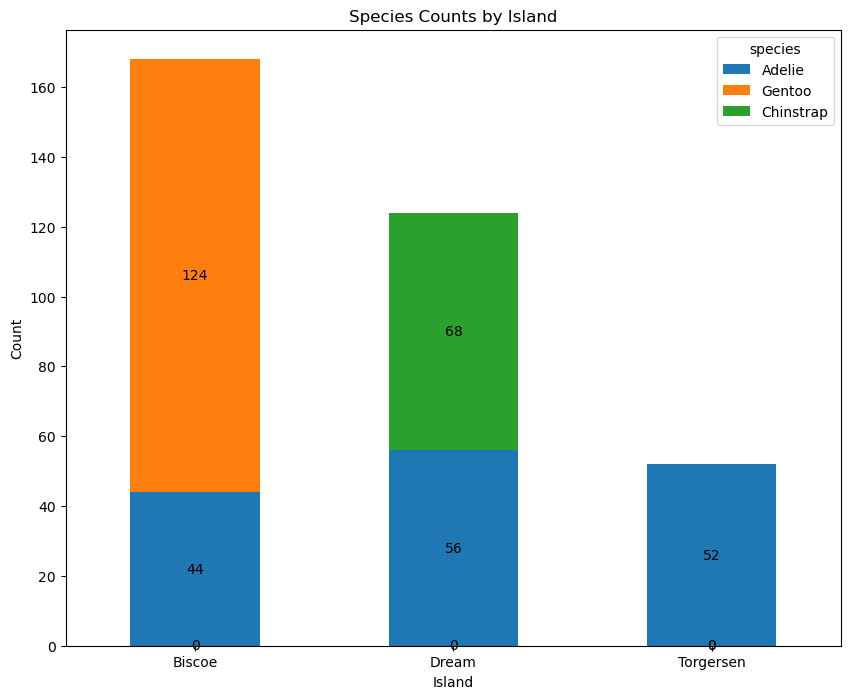

In [397]:
# Assuming species_counts is a Series, converting it to a DataFrame
species_counts_df = species_counts.reset_index()

# Pivoting the DataFrame to have islands as columns and species as rows
pivot_species_counts = species_counts_df.pivot(index='island', columns='species', values=0)

# Sorting the species by count in descending order
sorted_species = pivot_species_counts.sum(axis=0).sort_values(ascending=False).index

# Reordering the DataFrame based on sorted species
pivot_species_counts = pivot_species_counts[sorted_species]

# Plotting the stacked bar chart
ax = pivot_species_counts.plot(kind='bar', stacked=True, figsize=(10, 8))

# Adding value labels within each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Adding titles and labels
plt.title('Species Counts by Island')
plt.xlabel('Island')
plt.ylabel('Count')

# Rotating the x-axis labels
plt.xticks(rotation=0)


The data shows us that Biscoe Island is primarily inhabited by Gentoo penguins, with a count of 124. This means that there are a lot more Gentoo penguins than Adelie penguins, which only have a count of 44 on the same island. On Dream Island, we see a different picture. While Adelie penguins are still the most common with a count of 56, there's also a significant presence of Chinstrap penguins, with a count of 68. This suggests that Dream Island is home to a diverse mix of penguin species. Torgersen Island has a notable population of Adelie penguins, with a count of 52. This tells us that Adelie penguins are quite prevalent on Torgersen Island compared to other species. Lastly, it is noticeable that Adelie was the only penguin species of the dataset that were identified in all the three islands, which might indicate a broader habitat tolerance compared to other species in the dataset. Adelie penguins might be able to thrive in a variety of environments. Overall, each island has its own unique combination of penguin species, and studying these patterns helps scientists understand how penguins live in different environments.

## Continuous Numerical Data and Histogram

For the continuous numerical data, descriptive statistics is used to get a summary and initial insights into the data [[37]](#37) [[38]](#38). The function describe() in Pandas is ideal to return the description of the continuous data such as count of not-empy values; the average value; the standard deviation; the 25%, 50%, and 75% percentiles; the minimum, and maximum values [[39]](#39).

In [385]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The descriptive statistics reveal average measurements (mean) and their variability (standard deviation), highlighting significant diversity among penguins. Most penguins have bill lengths between 39.2 mm and 48.5 mm, bill depths between 15.6 mm and 18.7 mm, flipper lengths between 190.0 mm and 213.0 mm, and body masses ranging from 2,700.0 grams to 6,300.0 grams. Body masses exhibit the highest variation at 801.96 grams.   
These statistics provide key insights into the distribution and typical ranges of these attributes within the dataset.

### Histogram

Histograms are valuable for exploring and interpreting continuous numerical data due to their ability to reveal distributional patterns, identify outliers, and facilitate comparisons of data quantity within different bins according to Pannell (2023) [[40]](#40). 
From the four variables of data type categorical numerical described above, bill_depth_mm shows the best distribution as its data seems to be relatively symmetric and less variable distribution compared to the others. Variables that the data are normal distributed has symmetry around the mean, which facilitates easier interpretation of the statistical results and application of several statistical techniques [[41]](#41). Therefore, let's have a look at a histogram of the bill_depth_mm.

The provided code snippet processes the variable 'bill_depth_mm' by first removing any missing values [[42]](#42). It then constructs a histogram with a specified number of bins and plots it using plt.bar() [[43]](#43). Additional customization includes setting titles and labels for axes, as well as defining tick positions and labels along the x-axis [[35]](#35) [[44]](#44) [[45]](#45). A normal distribution is fitted to the data, with the mean and standard deviation estimated for the distribution [[19]](#19) [[46]](#46). The normal distribution curve is plotted alongside the histogram, showing the theoretical distribution of the data [[47]](#47). Furthermore, vertical dashed lines are added to mark the mean and median values of the dataset [[48]](#48). Legends are created to distinguish between the histogram, normal distribution, and the mean and median values, enhancing the interpretability of the plot [[49]](#49) [[50]](#50).

In simple terms, this code does a bunch of things smoothly. First off, it cleans up any missing data and then makes a cool histogram to show how the 'bill_depth_mm' data is spread out. It also throws in a theoretical model called a normal distribution, so you can see how your actual data compares to this idealized pattern [[50]](#50). Plus, it throws in some stats like the average (mean) and middle point (median) to give you a better idea of where most of your data falls. And to top it off, it adds those little legend boxes so you can easily see what is on the plot. Overall, it's like your all-in-one package for checking out and understanding the 'bill_depth_mm' data distribution.

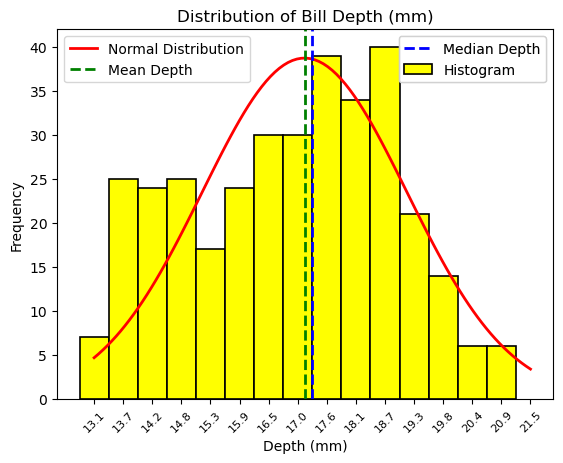

In [398]:
# Assuming 'df' is your DataFrame containing the data
data = df['bill_depth_mm'].dropna()

# Calculate histogram with specified number of bins
num_bins = 15
counts, bin_edges = np.histogram(data, bins=num_bins)

# Plot histogram using plt.bar() with bin edges and counts
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), color='yellow', edgecolor='black', linewidth=1.2, label='Histogram')

# Add title and labels
plt.title("Distribution of Bill Depth (mm)")
plt.xlabel("Depth (mm)")
plt.ylabel("Frequency")

# Calculate positions for tick labels at bin edges
tick_positions = bin_edges  # Use bin edges as tick positions

# Set custom x-axis tick positions and labels
plt.xticks(tick_positions, labels=[f"{bin_edge:.1f}" for bin_edge in bin_edges], rotation=45, fontsize=8)

# Fit a normal distribution to the data
mu, std = norm.fit(data)  # Estimate mean (mu) and standard deviation (std) of the data

# Generate x values for the normal distribution curve
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, std)  # Calculate the probability density function (PDF) for the normal distribution

# Plot the normal distribution curve (bell-shaped line)
plt.plot(x, pdf * len(data) * np.diff(bin_edges)[0], 'r-', linewidth=2, label='Normal Distribution')

# Calculate the mean and median of the data
mean_depth = np.mean(data)
median_depth = np.median(data)

# Add vertical lines at the mean and median values
plt.axvline(mean_depth, color='green', linestyle='dashed', linewidth=2, label='Mean Depth')
plt.axvline(median_depth, color='blue', linestyle='dashed', linewidth=2, label='Median Depth')

# Create legend handles and labels for different groups of legends
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend for left side (Histogram and Normal Distribution)
left_legend = plt.legend(handles[:2], labels[:2], loc='upper left')

# Create legend for right side (Mean Depth and Median Depth)
right_legend = plt.legend(handles[2:], labels[2:], loc='upper right')

# Add both legends to the plot
plt.gca().add_artist(left_legend)
plt.gca().add_artist(right_legend)


This histogram displays a symmetric distribution (bell-shaped). From the Summary Statistics section, it was observed that the value for the mean depth is 17.15 mm. The median depth can be seen in the histogram intersecting the bin value of 17.30 mm, which is close to the mean value. This confirms the symmetric distribution [[50]](#50).
Though this histogram follows a normal distribution, it is possible to observe a small deformation on the left side of the graphic between the second and forth bin, and slightly to the right of the center of the histogram on the 11th bin. This might be due to the nature of the dataset that accounts for penguins of different species, islands, sex and sizes. 

## Correlation between Two Variables from the Dataset.

At the previous section it was possible to identify a normal distribution for the bill depth and a good analysis was completed for it using the histogram to support the visualization of the data distribution.
In this section, an investigation is set up to confirm the correlation between the bill length and body mass, taking into consideration the information provided from the analysis of the descriptive statistics where it was pointed out that the body mass exhibited the highest variation among the 4 continous variables of this dataset, while the bill length has a moderate level of variability. So, it should be interesting to have a look in the correlation between these two continuous variables. To add a bit more of context, let's group by species to understand how the different species are distributed in this correlation. 
But, first, what is correlation? When we talk about "correlation" in statistics, we're mainly looking at how two things relate to each other in a straight-line kind of way. It's like when you plot points on a graph and they form a straight line. That's what we mean by "correlation" in statistics—it's about seeing how closely two variables move together in a straight line [[51]](#51).

Going back to the variables that will be used in this correlation. The bill length, body mass and species data are extracted from the dataset 'df', dropping any 'NaN' values from bill length and body mass, which were identified in these variables during the section Exploring the Dataset [[42]](#42).

In [387]:
# Get the bill lenght
blen= df['bill_length_mm'].dropna()

# Show
blen

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 342, dtype: float64

In [388]:
# Get the body mass
bmass = df['body_mass_g'].dropna()

# Show
bmass

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

In [389]:
# Get the categorical variable species
species = df['species']

# Show
species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

We then add a best fit line [[52]](#52). The following equation is used to calculate the Line of Best Fit:

$ y = mx + c = p_1 x^1 + p_0 = p_1 x + p_0$

The function polyfit () from Numpy is used here to fit a straight line between x (the bill length "blen") and y (the body mass "bmass").

In [390]:
#Fit a straight line between x and y.
m, c = np.polyfit(blen, bmass, 1)

# Show m and C.
m, c

(87.4152770528756, 362.30672165392207)

The line of code linspace() from numpy module creates an array (bf_x) containing 100 evenly spaced numbers starting from 30mm and ending at 60mm, which are whole values closer to the minimum (32.1mm) and maximum (59.6mm) values of the variable bill lenght as per section Continuous Numerical Data and Histogram [[53]](#53). These numbers are evenly distributed along a linear scale, making it convenient for creating plots or performing numerical computations over a specific range.

Next, the equation m * bf_x + c is applied representing the formula for a straight line where m is the slope, bf_x are the x-values, and c is the y-intercept. By multiplying the slope (m) with each x-value (bf_x) and adding the y-intercept (c), we obtain the corresponding y-values for the best-fit line [[52]](#52). 

In [391]:
# x values for best fit line.
bf_x = np.linspace (30, 60, 100)

# y values for best fit line.
bf_y = m * bf_x + c

In this script below, a scatter plot of penguin data is created using Seaborn's scatterplot() function [[54]](#54). The data for the x-axis (blen) represents the bill length of the penguins. The data for the y-axis (bmass) represents their body mass. The points on the scatter plot are colored according to the species of penguins using the hue parameter [[55]](#55). 

Additionally, a best-fit line is plotted on the same graph using Matplotlib's plot() function [[56]](#56). This line represents the linear relationship between bill length and body mass, calculated earlier as bf_x and bf_y. The line is drawn in red (r-) and labeled as 'Best Fit Line' in the legend.

Seaborn is built on top of Matplotlib, so it works seamlessly with Matplotlib axes (ax) and figures (fig) [[57]](#57).

Various formatting options are applied to the plot, such as setting axis labels ('Bill Length (mm)' and 'Body Mass (g)'), a title ('Penguins Bill Length x Body Mass grouped by Species'), and limits for the x and y-axes [[58]](#58) [[59]](#59) [[60]](#60). The legend is also displayed to help interpret the plot [[49]](#49). Overall, this code snippet creates a visual representation of the relationship between bill length and body mass among penguins, categorized by species, and overlays a best-fit line to highlight any linear trends in the data.

Finally the line of code corrcoef() calculates a number that tells us how closely related two things are in a straight-line way [[61]](#61). Specifically, it's looking at how closely bill length and body mass of penguins are related. The number it gives us helps us understand if changes in one thing (like bill length) tend to go along with changes in the other thing (like body mass). If the number is close to 1, it means there's a strong positive relationship, while if it's close to -1, it means there's a strong negative relationship. If it's around 0, it means there's not much of a relationship at all.

array([[1.        , 0.59510982],
       [0.59510982, 1.        ]])

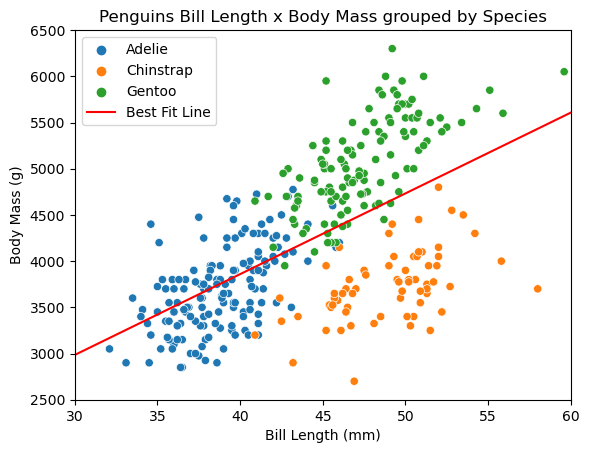

In [399]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

# Sample plot with species categorization.
sns.scatterplot(data=df, x=blen, y=bmass, hue=species, ax=ax)

# Plot the best fit line.
ax.plot(bf_x, bf_y, 'r-', label='Best Fit Line')

# Axis labels.
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')

# Title.
ax.set_title('Penguins Bill Length x Body Mass grouped by Species')

# X Limits.
ax.set_xlim(30, 60)

# Y Limits.
ax.set_ylim(2500, 6500)

# Show the legend.
ax.legend()

# Measure the correlation coeficient
np.corrcoef(blen,bmass)

Based on this correlation, we can conclude that there is a moderate positive relationship between bill length and body mass in penguins. A correlation coefficient of 0.5951 suggests that there is a tendency for penguins with longer bills to have higher body masses [[62]](#62). However, the correlation is not extremely strong, indicating that other factors might also influence body mass, and bill length alone might not be sufficient to predict body mass accurately. Further analysis or consideration of additional factors may be necessary to fully understand the relationship between these variables. 

## Opportunities for further investigation
To dig deeper into the dataset, students could explore how different penguin traits relate to each other using techniques like principal component analysis or clustering to find hidden patterns [[63]](#63) [[64]](#64). They could also try building models to predict things like a penguin's body mass or species based on other features, using method like regression [[65]](#65). By trying out these methods, students can learn more about penguins and how their traits and behaviors are connected, which could help researchers understand them better in the wild.

## Conclusion

In summary, this notebook is like a step-by-step guide for students to understand the Palmer Penguins dataset. It helps you explore the data and learn about different penguin species.

First, it shows you how to load the dataset and look at its basic details. Then, it teaches you how to analyze categorical data using bar charts and understand numbers like averages and ranges for things like penguin sizes.

Next, you get to see histograms, which are like bar charts but for continuous numbers. They help you understand things like how common different penguin sizes are.

Lastly, you learn about correlations, which is like seeing if two things go together. For example, it looks at whether penguins with longer bills tend to be heavier. This part helps you understand how different penguin traits might relate to each other.

Overall, this notebook is like a friendly guide for students to learn about penguins and how to study their data. It's full of helpful explanations and examples to make learning easy and fun!

***
### End